# Initial budget

In [1]:
budget = 300000

# Prepare data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("./data/portfolio_optimization.csv", index_col="TRADEDATE")

In [4]:
df.head()

,GAZP,ROSN,NVTK,LKOH,GMKN,SBER,PLZL,NLMK,SNGS,TATN,YNDX,ALRS,POLY,MGNT
TRADEDATE,,,,,,,,,,,,,,
2017-12-01,133.02,292.0,663.5,3344.0,10080.0,221.50,4920.0,130.22,27.705,459.75,1931.5,77.53,704.8,6340.0
2017-12-04,133.77,292.7,666.0,3390.5,10166.0,224.60,4868.0,134.31,27.405,511.45,1907.0,75.51,690.4,6370.0
2017-12-05,133.65,293.4,669.8,3403.0,10077.0,223.91,4697.0,133.96,27.330,506.70,1899.0,75.00,672.0,6300.0
2017-12-06,134.00,292.4,673.0,3403.0,10166.0,223.75,4815.0,138.76,27.990,510.90,1900.0,75.80,665.9,6335.0
2017-12-07,133.02,292.5,677.1,3374.5,10063.0,219.81,4780.0,139.20,27.670,507.00,1949.5,74.82,666.9,6355.0


In [5]:
df.index.min(), df.index.max()

('2017-12-01', '2022-11-29')

In [6]:
# save assets list
assets = df.columns[:]
assets

Index(['GAZP', 'ROSN', 'NVTK', 'LKOH', 'GMKN', 'SBER', 'PLZL', 'NLMK', 'SNGS',
       'TATN', 'YNDX', 'ALRS', 'POLY', 'MGNT'],
      dtype='object')

In [7]:
len(assets)

14

In [8]:
df

,GAZP,ROSN,NVTK,LKOH,GMKN,SBER,PLZL,NLMK,SNGS,TATN,YNDX,ALRS,POLY,MGNT
TRADEDATE,,,,,,,,,,,,,,
2017-12-01,133.02,292.00,663.5,3344.0,10080.0,221.50,4920.0,130.22,27.705,459.75,1931.5,77.53,704.8,6340.0
2017-12-04,133.77,292.70,666.0,3390.5,10166.0,224.60,4868.0,134.31,27.405,511.45,1907.0,75.51,690.4,6370.0
2017-12-05,133.65,293.40,669.8,3403.0,10077.0,223.91,4697.0,133.96,27.330,506.70,1899.0,75.00,672.0,6300.0
2017-12-06,134.00,292.40,673.0,3403.0,10166.0,223.75,4815.0,138.76,27.990,510.90,1900.0,75.80,665.9,6335.0
2017-12-07,133.02,292.50,677.1,3374.5,10063.0,219.81,4780.0,139.20,27.670,507.00,1949.5,74.82,666.9,6355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-23,169.15,337.95,1089.6,4679.0,14752.0,136.59,7140.5,106.74,21.480,368.30,2135.0,65.88,340.8,4879.5
2022-11-24,168.96,334.75,1078.0,4664.0,14766.0,136.61,7068.0,106.16,22.060,367.30,2130.0,65.76,345.2,4893.0
2022-11-25,169.03,335.90,1065.4,4669.0,14632.0,136.53,7008.0,105.40,21.710,366.40,2020.4,65.28,342.2,4849.0


In [9]:
df = df[df.index < '2022-01-01']

## To float

In [10]:
for col in df.columns:
    df[col] = df[col].astype("float64")

In [11]:
df.head()

,GAZP,ROSN,NVTK,LKOH,GMKN,SBER,PLZL,NLMK,SNGS,TATN,YNDX,ALRS,POLY,MGNT
TRADEDATE,,,,,,,,,,,,,,
2017-12-01,133.02,292.0,663.5,3344.0,10080.0,221.50,4920.0,130.22,27.705,459.75,1931.5,77.53,704.8,6340.0
2017-12-04,133.77,292.7,666.0,3390.5,10166.0,224.60,4868.0,134.31,27.405,511.45,1907.0,75.51,690.4,6370.0
2017-12-05,133.65,293.4,669.8,3403.0,10077.0,223.91,4697.0,133.96,27.330,506.70,1899.0,75.00,672.0,6300.0
2017-12-06,134.00,292.4,673.0,3403.0,10166.0,223.75,4815.0,138.76,27.990,510.90,1900.0,75.80,665.9,6335.0
2017-12-07,133.02,292.5,677.1,3374.5,10063.0,219.81,4780.0,139.20,27.670,507.00,1949.5,74.82,666.9,6355.0


## Delete rows with nan

In [12]:
for col in df.columns:
    df = df[df[col].notna()]

In [13]:
df.isnull().sum()

GAZP    0
ROSN    0
NVTK    0
LKOH    0
GMKN    0
SBER    0
PLZL    0
NLMK    0
SNGS    0
TATN    0
YNDX    0
ALRS    0
POLY    0
MGNT    0
dtype: int64

In [14]:
df

,GAZP,ROSN,NVTK,LKOH,GMKN,SBER,PLZL,NLMK,SNGS,TATN,YNDX,ALRS,POLY,MGNT
TRADEDATE,,,,,,,,,,,,,,
2017-12-01,133.02,292.00,663.5,3344.0,10080.0,221.50,4920.0,130.22,27.705,459.75,1931.5,77.53,704.8,6340.0
2017-12-04,133.77,292.70,666.0,3390.5,10166.0,224.60,4868.0,134.31,27.405,511.45,1907.0,75.51,690.4,6370.0
2017-12-05,133.65,293.40,669.8,3403.0,10077.0,223.91,4697.0,133.96,27.330,506.70,1899.0,75.00,672.0,6300.0
2017-12-06,134.00,292.40,673.0,3403.0,10166.0,223.75,4815.0,138.76,27.990,510.90,1900.0,75.80,665.9,6335.0
2017-12-07,133.02,292.50,677.1,3374.5,10063.0,219.81,4780.0,139.20,27.670,507.00,1949.5,74.82,666.9,6355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,338.79,572.05,1652.6,6313.5,21824.0,293.89,13010.0,212.40,38.410,482.00,4424.8,115.30,1268.6,5592.5
2021-12-27,343.97,582.00,1697.6,6397.5,22528.0,295.68,13046.0,214.60,38.545,490.40,4467.8,116.55,1260.0,5665.5
2021-12-28,343.23,596.20,1700.0,6478.0,22642.0,295.00,12960.5,215.76,39.265,496.40,4482.0,119.98,1259.9,5658.0


# Draw graph

<AxesSubplot:xlabel='TRADEDATE'>

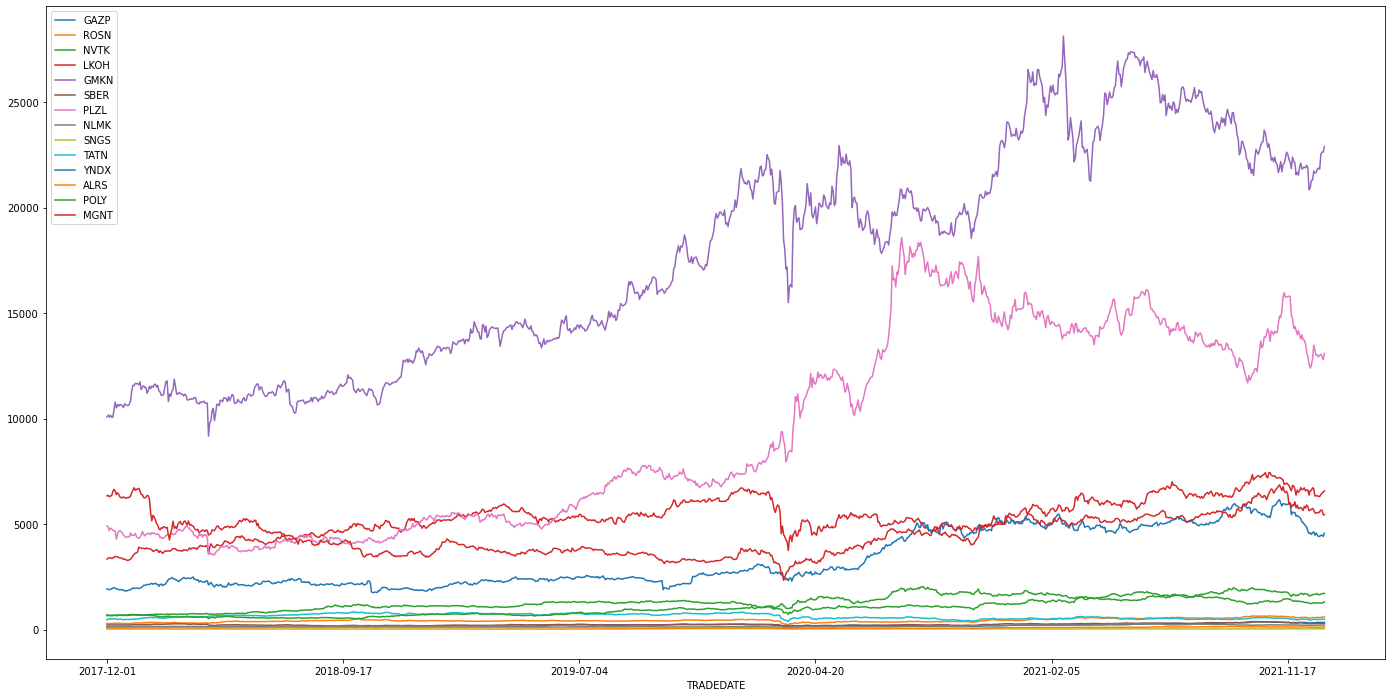

In [15]:
_, ax = plt.subplots(figsize=(24, 12))
df[assets].plot(ax=ax)

In [16]:
df[assets]

,GAZP,ROSN,NVTK,LKOH,GMKN,SBER,PLZL,NLMK,SNGS,TATN,YNDX,ALRS,POLY,MGNT
TRADEDATE,,,,,,,,,,,,,,
2017-12-01,133.02,292.00,663.5,3344.0,10080.0,221.50,4920.0,130.22,27.705,459.75,1931.5,77.53,704.8,6340.0
2017-12-04,133.77,292.70,666.0,3390.5,10166.0,224.60,4868.0,134.31,27.405,511.45,1907.0,75.51,690.4,6370.0
2017-12-05,133.65,293.40,669.8,3403.0,10077.0,223.91,4697.0,133.96,27.330,506.70,1899.0,75.00,672.0,6300.0
2017-12-06,134.00,292.40,673.0,3403.0,10166.0,223.75,4815.0,138.76,27.990,510.90,1900.0,75.80,665.9,6335.0
2017-12-07,133.02,292.50,677.1,3374.5,10063.0,219.81,4780.0,139.20,27.670,507.00,1949.5,74.82,666.9,6355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,338.79,572.05,1652.6,6313.5,21824.0,293.89,13010.0,212.40,38.410,482.00,4424.8,115.30,1268.6,5592.5
2021-12-27,343.97,582.00,1697.6,6397.5,22528.0,295.68,13046.0,214.60,38.545,490.40,4467.8,116.55,1260.0,5665.5
2021-12-28,343.23,596.20,1700.0,6478.0,22642.0,295.00,12960.5,215.76,39.265,496.40,4482.0,119.98,1259.9,5658.0


# Log normalization

In [17]:
log_ret = np.log(df[assets] / df[assets].shift(1))
log_ret.head()

,GAZP,ROSN,NVTK,LKOH,GMKN,SBER,PLZL,NLMK,SNGS,TATN,YNDX,ALRS,POLY,MGNT
TRADEDATE,,,,,,,,,,,,,,
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-04,0.005622,0.002394,0.003761,0.01381,0.008496,0.013898,-0.010625,0.030925,-0.010887,0.106567,-0.012766,-0.026400,-0.020643,0.004721
2017-12-05,-0.000897,0.002389,0.005689,0.00368,-0.008793,-0.003077,-0.035759,-0.002609,-0.002740,-0.009331,-0.004204,-0.006777,-0.027013,-0.011050
2017-12-06,0.002615,-0.003414,0.004766,0.00000,0.008793,-0.000715,0.024812,0.035205,0.023862,0.008255,0.000526,0.010610,-0.009119,0.005540
2017-12-07,-0.007340,0.000342,0.006074,-0.00841,-0.010183,-0.017766,-0.007295,0.003166,-0.011499,-0.007663,0.025719,-0.013013,0.001501,0.003152


In [18]:
log_ret

,GAZP,ROSN,NVTK,LKOH,GMKN,SBER,PLZL,NLMK,SNGS,TATN,YNDX,ALRS,POLY,MGNT
TRADEDATE,,,,,,,,,,,,,,
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-04,0.005622,0.002394,0.003761,0.013810,0.008496,0.013898,-0.010625,0.030925,-0.010887,0.106567,-0.012766,-0.026400,-0.020643,0.004721
2017-12-05,-0.000897,0.002389,0.005689,0.003680,-0.008793,-0.003077,-0.035759,-0.002609,-0.002740,-0.009331,-0.004204,-0.006777,-0.027013,-0.011050
2017-12-06,0.002615,-0.003414,0.004766,0.000000,0.008793,-0.000715,0.024812,0.035205,0.023862,0.008255,0.000526,0.010610,-0.009119,0.005540
2017-12-07,-0.007340,0.000342,0.006074,-0.008410,-0.010183,-0.017766,-0.007295,0.003166,-0.011499,-0.007663,0.025719,-0.013013,0.001501,0.003152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,-0.003006,-0.012249,-0.001934,0.001427,-0.002197,0.003716,0.006516,0.005760,-0.008813,-0.003934,0.003214,0.013974,0.000394,0.009703
2021-12-27,0.015174,0.017244,0.026866,0.013217,0.031749,0.006072,0.002763,0.010305,0.003509,0.017277,0.009671,0.010783,-0.006802,0.012969
2021-12-28,-0.002154,0.024106,0.001413,0.012505,0.005048,-0.002302,-0.006575,0.005391,0.018507,0.012161,0.003173,0.029005,-0.000079,-0.001325


<AxesSubplot:xlabel='TRADEDATE'>

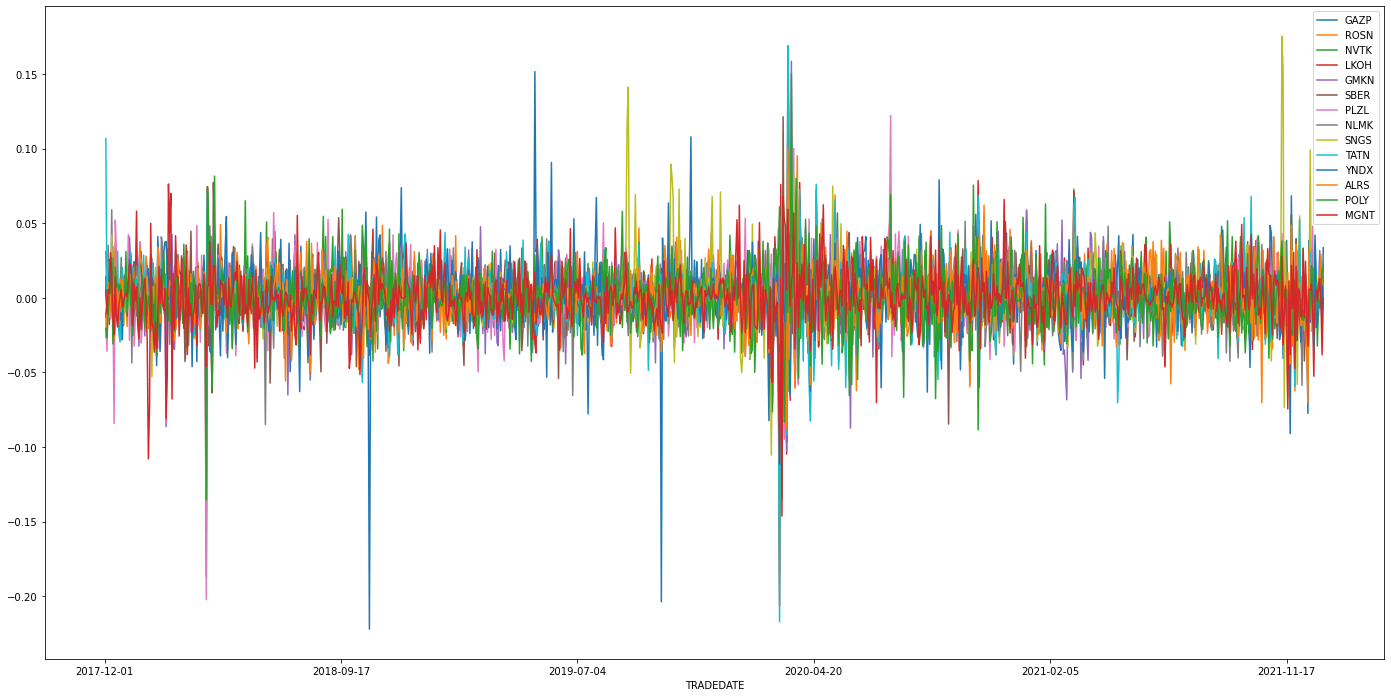

In [19]:
_, ax = plt.subplots(figsize=(24, 12))
log_ret[assets].plot(ax=ax)

In [20]:
log_ret.cov()

,GAZP,ROSN,NVTK,LKOH,GMKN,SBER,PLZL,NLMK,SNGS,TATN,YNDX,ALRS,POLY,MGNT
GAZP,0.000296,0.000171,0.000140,0.000171,0.000116,0.000169,0.000030,0.000093,0.000134,0.000187,0.000083,0.000108,0.000032,0.000097
ROSN,0.000171,0.000338,0.000173,0.000252,0.000142,0.000177,0.000031,0.000116,0.000177,0.000281,0.000082,0.000123,0.000030,0.000110
NVTK,0.000140,0.000173,0.000373,0.000184,0.000153,0.000165,0.000057,0.000113,0.000152,0.000211,0.000093,0.000137,0.000055,0.000090
LKOH,0.000171,0.000252,0.000184,0.000367,0.000141,0.000180,0.000033,0.000117,0.000187,0.000297,0.000093,0.000127,0.000037,0.000107
GMKN,0.000116,0.000142,0.000153,0.000141,0.000346,0.000148,0.000107,0.000127,0.000122,0.000162,0.000099,0.000117,0.000116,0.000080
SBER,0.000169,0.000177,0.000165,0.000180,0.000148,0.000375,0.000059,0.000117,0.000121,0.000189,0.000130,0.000145,0.000043,0.000120
PLZL,0.000030,0.000031,0.000057,0.000033,0.000107,0.000059,0.000412,0.000048,0.000057,0.000026,0.000074,0.000048,0.000249,0.000035
NLMK,0.000093,0.000116,0.000113,0.000117,0.000127,0.000117,0.000048,0.000298,0.000095,0.000141,0.000079,0.000114,0.000051,0.000069
SNGS,0.000134,0.000177,0.000152,0.000187,0.000122,0.000121,0.000057,0.000095,0.000434,0.000223,0.000080,0.000114,0.000052,0.000098
TATN,0.000187,0.000281,0.000211,0.000297,0.000162,0.000189,0.000026,0.000141,0.000223,0.000453,0.000092,0.000139,0.000036,0.000127


In [21]:
df[assets].head()

,GAZP,ROSN,NVTK,LKOH,GMKN,SBER,PLZL,NLMK,SNGS,TATN,YNDX,ALRS,POLY,MGNT
TRADEDATE,,,,,,,,,,,,,,
2017-12-01,133.02,292.0,663.5,3344.0,10080.0,221.50,4920.0,130.22,27.705,459.75,1931.5,77.53,704.8,6340.0
2017-12-04,133.77,292.7,666.0,3390.5,10166.0,224.60,4868.0,134.31,27.405,511.45,1907.0,75.51,690.4,6370.0
2017-12-05,133.65,293.4,669.8,3403.0,10077.0,223.91,4697.0,133.96,27.330,506.70,1899.0,75.00,672.0,6300.0
2017-12-06,134.00,292.4,673.0,3403.0,10166.0,223.75,4815.0,138.76,27.990,510.90,1900.0,75.80,665.9,6335.0
2017-12-07,133.02,292.5,677.1,3374.5,10063.0,219.81,4780.0,139.20,27.670,507.00,1949.5,74.82,666.9,6355.0


In [22]:
df[assets].shift(1)

,GAZP,ROSN,NVTK,LKOH,GMKN,SBER,PLZL,NLMK,SNGS,TATN,YNDX,ALRS,POLY,MGNT
TRADEDATE,,,,,,,,,,,,,,
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-04,133.02,292.00,663.5,3344.0,10080.0,221.50,4920.0,130.22,27.705,459.75,1931.5,77.53,704.8,6340.0
2017-12-05,133.77,292.70,666.0,3390.5,10166.0,224.60,4868.0,134.31,27.405,511.45,1907.0,75.51,690.4,6370.0
2017-12-06,133.65,293.40,669.8,3403.0,10077.0,223.91,4697.0,133.96,27.330,506.70,1899.0,75.00,672.0,6300.0
2017-12-07,134.00,292.40,673.0,3403.0,10166.0,223.75,4815.0,138.76,27.990,510.90,1900.0,75.80,665.9,6335.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,339.81,579.10,1655.8,6304.5,21872.0,292.80,12925.5,211.18,38.750,483.90,4410.6,113.70,1268.1,5538.5
2021-12-27,338.79,572.05,1652.6,6313.5,21824.0,293.89,13010.0,212.40,38.410,482.00,4424.8,115.30,1268.6,5592.5
2021-12-28,343.97,582.00,1697.6,6397.5,22528.0,295.68,13046.0,214.60,38.545,490.40,4467.8,116.55,1260.0,5665.5


# Monte Carlo

## init arrays

In [23]:
num_iterations = 30000

In [24]:
weights_array = np.zeros((num_iterations, len(assets)))
return_array = np.zeros(num_iterations)
variance_array = np.zeros(num_iterations)
sharpe_arr = np.zeros(num_iterations)

## repeat num_iterations times

In [25]:
for i in range(num_iterations):
    local_weights = np.array(np.random.random(len(assets)))
    local_weights = local_weights / np.sum(local_weights)

    weights_array[i, :] = local_weights
    return_array[i] = np.sum((log_ret.mean() * local_weights) * 252)
    variance_array[i] = np.sqrt(np.dot(local_weights.T, np.dot(log_ret.cov() * 252, local_weights)))
    sharpe_arr[i] = return_array[i] / variance_array[i]

## show max ratio

In [26]:
sharpe_arr.max()

1.0408561620218784

In [27]:
optimal_weights = weights_array[sharpe_arr.argmax(), :]
max_return = return_array[sharpe_arr.argmax()]
max_variance = variance_array[sharpe_arr.argmax()]
f"Max return {round(max_return * 100, 2)}, Max_variance: {round(max_variance * 100, 2)}"

'Max return 19.34, Max_variance: 18.58'

## draw graph

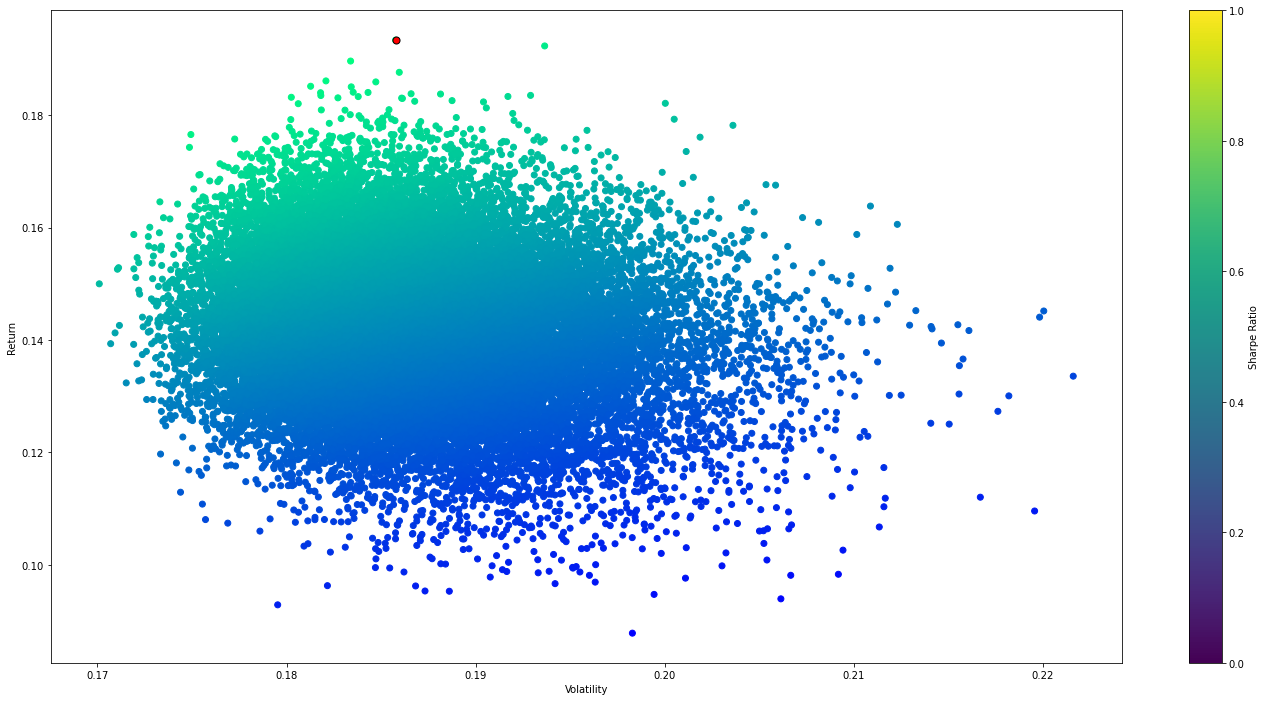

In [28]:
plt.figure(figsize=(24,12))
plt.scatter(variance_array, return_array, c=sharpe_arr, cmap='winter')
plt.scatter(max_variance,max_return, c='red', s=50, edgecolors='black')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
None

## show result as table

In [29]:
pd.DataFrame({
    "position": [round(weight * budget, 2) for weight in optimal_weights],
    "percent": [round(weight * 100, 2) for weight in optimal_weights]
}, index=assets).sort_values('percent', ascending=False)

,position,percent
ROSN,44044.22,14.68
GMKN,42578.85,14.19
NVTK,40866.87,13.62
GAZP,40675.87,13.56
PLZL,38898.31,12.97
YNDX,26351.96,8.78
POLY,23359.66,7.79
SNGS,11965.93,3.99
NLMK,10682.38,3.56
LKOH,8883.63,2.96


In [33]:
sorted_result = pd.DataFrame({
    #"position": [round(weight * budget, 2) for weight in optimal_weights],
    "percent": [round(weight * 100, 2) for weight in optimal_weights]
}, index=assets).sort_values('percent', ascending=False)
sorted_result.to_csv("data/portfolio_1.csv")
sorted_result

,percent
ROSN,14.68
GMKN,14.19
NVTK,13.62
GAZP,13.56
PLZL,12.97
YNDX,8.78
POLY,7.79
SNGS,3.99
NLMK,3.56
LKOH,2.96


In [31]:
np.sum(optimal_weights)

1.0